In [12]:
import categorical_preds as cp
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt

## All pre-processing

In [3]:
x,y, df = cp.all_prep("../data/cars.csv")

In [4]:
df.head()

,odometer_value,year_produced,engine_has_gas,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,up_counter,feature_0,...,state_owned,drivetrain_all,drivetrain_front,drivetrain_rear,location_region_Брестская обл.,location_region_Витебская обл.,location_region_Гомельская обл.,location_region_Гродненская обл.,location_region_Минская обл.,location_region_Могилевская обл.
0,190000,2010,0,2.5,0,10900.00,0,9,13,0,...,True,True,False,False,False,False,False,False,True,False
1,290000,2002,0,3.0,0,5000.00,1,12,54,0,...,True,True,False,False,False,False,False,False,True,False
2,402000,2001,0,2.5,0,2800.00,1,4,72,0,...,True,True,False,False,False,False,False,False,True,False
3,10000,1999,0,3.0,0,9999.00,1,9,42,1,...,True,True,False,False,False,False,False,False,True,False
4,280000,2001,0,2.5,0,2134.11,1,14,7,0,...,True,True,False,False,False,False,True,False,False,False


In [5]:
x.shape, y.shape

((38521, 875), (38521,))

## K Means Clustering

## 2 Clusters

In [13]:
kmeans_2 = KMeans(n_clusters=2, random_state=0, n_init="auto").fit_predict(df)

In [10]:
kmeans_2

array([1, 0, 0, ..., 0, 1, 0])

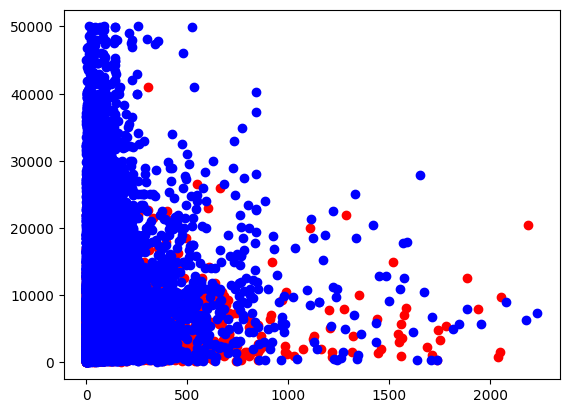

In [47]:
# duration listed over price
filtered_0 = df[kmeans_2 ==0]
filtered_1 = df[kmeans_2 ==1]
#plotting the results
plt.scatter(filtered_0["duration_listed"] , filtered_0["price_usd"], color= "red")
plt.scatter(filtered_1["duration_listed"], filtered_1["price_usd"], color = "blue")
plt.show()

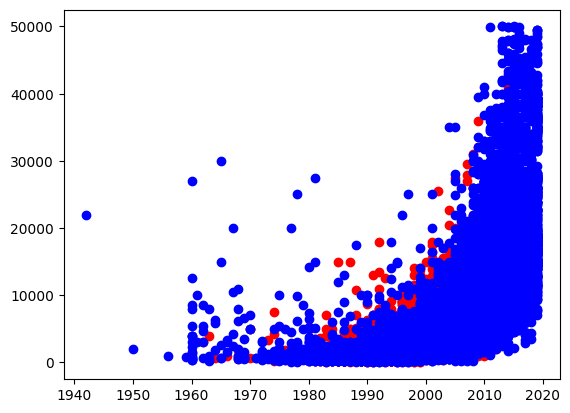

In [57]:
filtered_0 = df[kmeans_2 ==0]
filtered_1 = df[kmeans_2 ==1]
#plotting the results
# year produced over price
plt.scatter(filtered_0["year_produced"] , filtered_0["price_usd"], color= "red")
plt.scatter(filtered_1["year_produced"], filtered_1["price_usd"], color = "blue")
plt.show()

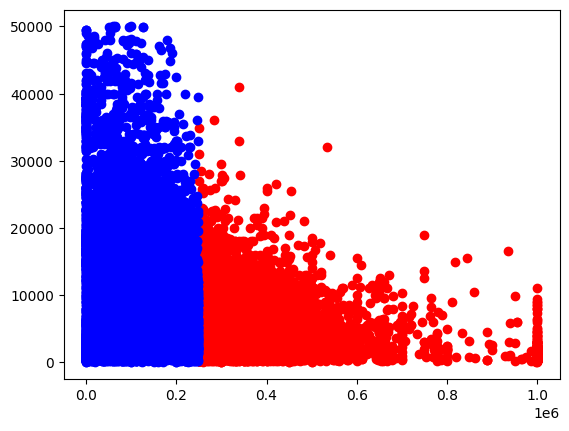

In [53]:
# odemeter reading over price
filtered_0 = df[kmeans_2 ==0]
filtered_1 = df[kmeans_2 ==1]
#plotting the results
plt.scatter(filtered_0.iloc[:,0] , filtered_0["price_usd"], color= "red")
plt.scatter(filtered_1.iloc[:,0], filtered_1["price_usd"], color = "blue")
plt.show()

In [ ]:
# odemeter reading over year produced
filtered_0 = df[kmeans_2 ==0]
filtered_1 = df[kmeans_2 ==1]
#plotting the results
plt.scatter(filtered_0.iloc[:,0] , filtered_0.iloc[:,1], color= "red")
plt.scatter(filtered_1.iloc[:,0], filtered_1.iloc[:,1], color = "blue")
plt.show()

## 5 Custers

In [29]:
kmeans_5 = KMeans(n_clusters=5, random_state=0, n_init="auto").fit_predict(df)

In [30]:
kmeans_5

array([3, 0, 4, ..., 2, 1, 0])

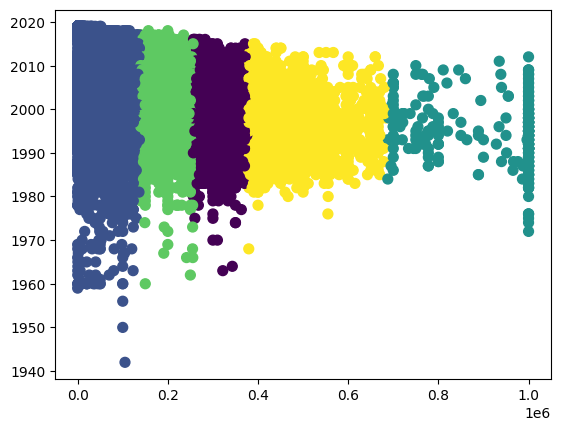

In [49]:
# odemeter reading over year produced
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_5, s=50, cmap='viridis')

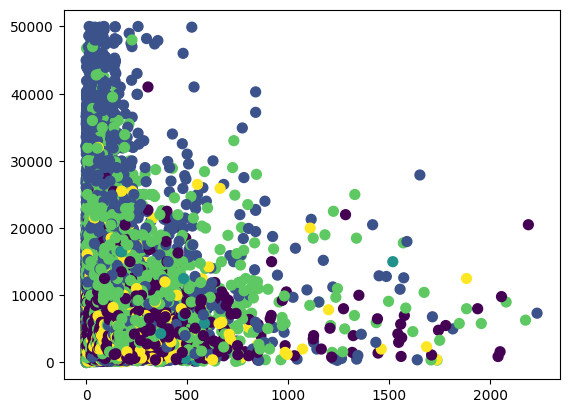

In [51]:
# duration over price
plt.scatter(df["duration_listed"] , df["price_usd"], c=kmeans_5, s=50, cmap='viridis')

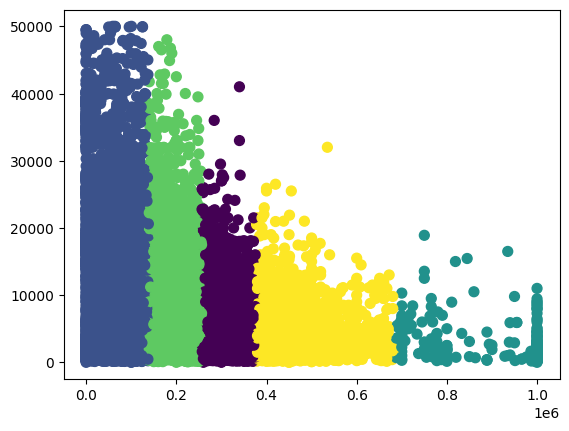

In [55]:
# odemeter over price
plt.scatter(df.iloc[:,0] , df["price_usd"], c=kmeans_5, s=50, cmap='viridis')

## 10 Clusters

In [40]:
kmeans_10 = KMeans(n_clusters=10, random_state=0, n_init="auto").fit_predict(df)

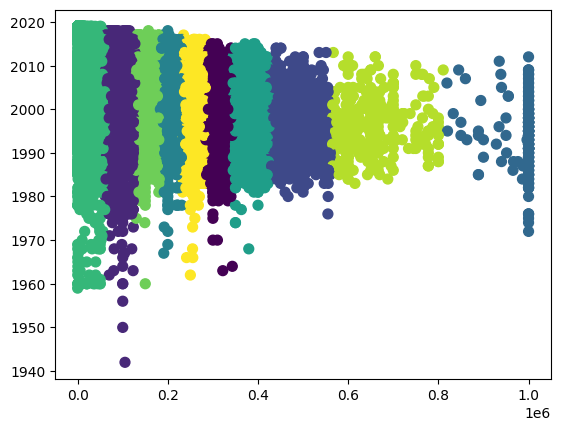

In [50]:
# odemeter reading over year produced

plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans_10, s=50, cmap='viridis')

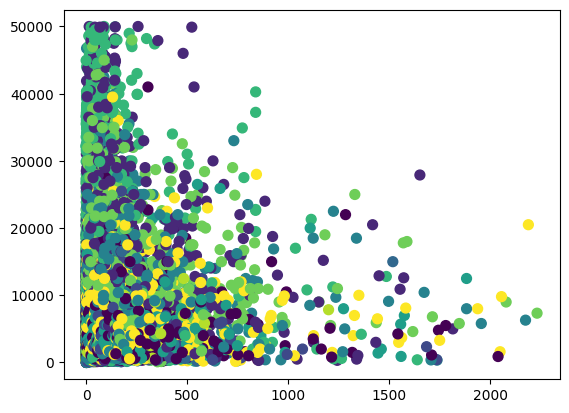

In [46]:
# duration list over price 
plt.scatter(df["duration_listed"] , df["price_usd"], c=kmeans_10, s=50, cmap='viridis')

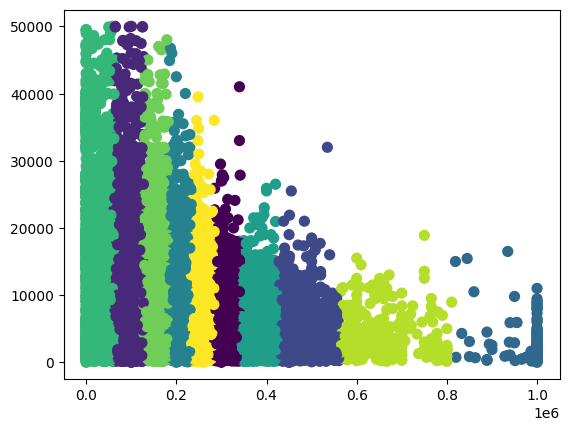

In [56]:
# odemeter over price 
plt.scatter(df.iloc[:,0] , df["price_usd"], c=kmeans_10, s=50, cmap='viridis')

## Insights

- For all cluster sizes: 2, 5 and 10 the following is true
    - The distinction of clusters was most clear when comparing odemeter reading over year produced or odemeter over price
    - No overlap of clusters when comparing odemeter to price or odemeter to year produced
    - There's overlap in clusters between duration and price. 
    - There's overlap in clusters between year produced and price